In [30]:
import pandas as pd

df1 = pd.read_csv('data/합계출산율_지역별.csv')
df2 = pd.read_csv('data/시도별사교육참여율.csv')
merged_df = pd.merge(df1, df2, on=['시점', '지역별'], how='outer')
merged_df.head(), merged_df['지역별'].unique()

(       지역별    시점    출생아수  합계출산율  사교육참여율
 0  강원특별자치도  2000   19482  1.600     NaN
 1      경기도  2000  141704  1.628     NaN
 2     경상남도  2000   41680  1.586     NaN
 3     경상북도  2000   35190  1.578     NaN
 4    광주광역시  2000   21148  1.636     NaN,
 array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
        '부산광역시', '서울', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
        '제주특별자치도', '충청남도', '충청북도'], dtype=object))

C:\Users\user\AppData\Local\Temp\ipykernel_4088\3118854125.py:23: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sns.barplot(x='지역별', y='값', hue='지표', data=df_melted[df_melted['지표'] == '사교육참여율'], ax=ax1, color='lightblue', alpha=0.7)


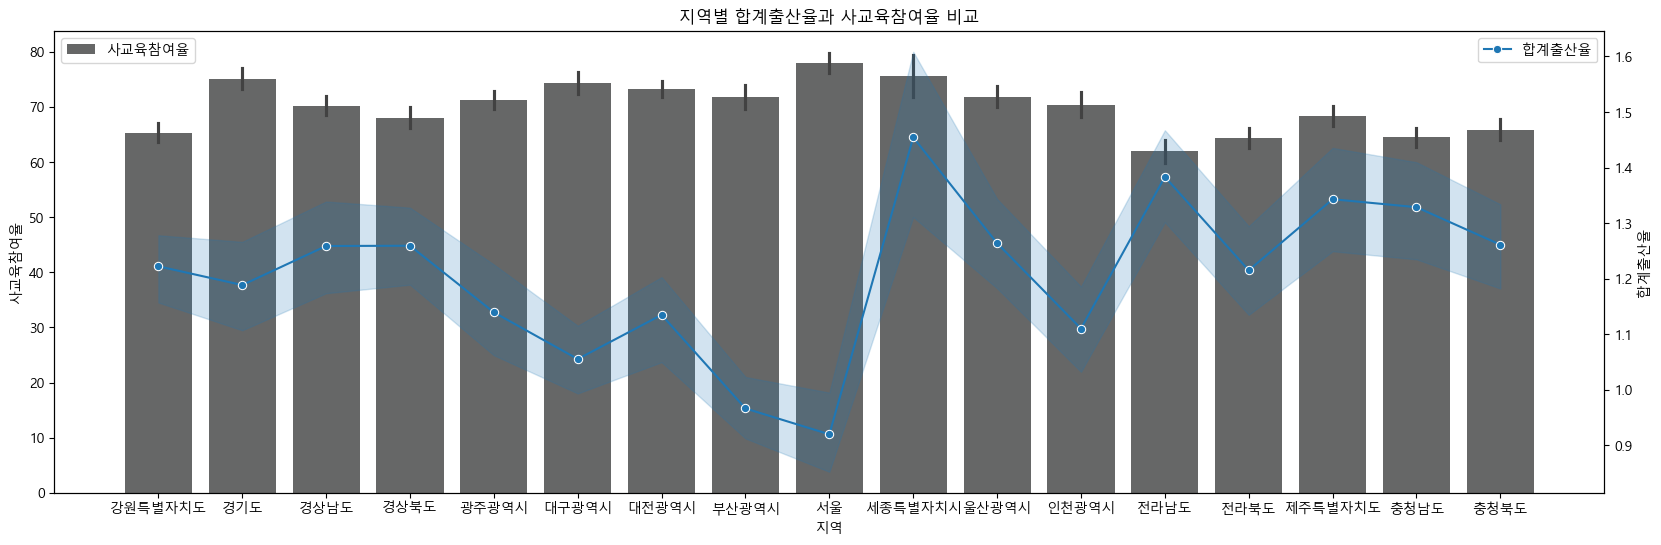

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 데이터프레임을 길게 변형
df_melted = merged_df.melt(id_vars='지역별', value_vars=['합계출산율', '사교육참여율'], 
                            var_name='지표', value_name='값')

# 데이터 타입 변환
df_melted['지역별'] = df_melted['지역별'].astype('category')
df_melted['값'] = pd.to_numeric(df_melted['값'], errors='coerce')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 6))

# 사교육참여율을 바 그래프로
sns.barplot(x='지역별', y='값', hue='지표', data=df_melted[df_melted['지표'] == '사교육참여율'], ax=ax1, color='lightblue', alpha=0.7)

# 합계출산율을 선형 그래프로
ax2 = ax1.twinx()  # y축을 공유하는 새로운 축
sns.lineplot(x='지역별', y='값', hue='지표', data=df_melted[df_melted['지표'] == '합계출산율'], ax=ax2, marker='o', color='orange')

# 그래프 제목 및 레이블 설정
ax1.set_title('지역별 합계출산율과 사교육참여율 비교')
ax1.set_ylabel('사교육참여율')
ax2.set_ylabel('합계출산율')
ax1.set_xlabel('지역')

# 범례 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()